# Test with facebook prophet on coin market data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [20]:
# where the mine data is stored
FOLDER = '../01.Original_data/2020-06-27.cmp/'
data = pd.read_csv(f"{FOLDER}XRP__XRP.csv", index_col=0)
data.head()

,Date,Open,High,Low,Close,Volume,Market_cap
0,"Jun 25, 2020","0,184076","0,184982","0,180956","0,183570",1.055.030.012,8.124.389.491
1,"Jun 24, 2020","0,188700","0,190857","0,183050","0,184272",1.138.044.691,8.155.465.082
2,"Jun 23, 2020","0,189295","0,189973","0,187062","0,188680",1.093.605.185,8.350.557.840
3,"Jun 22, 2020","0,185665","0,190080","0,185594","0,189272",1.209.278.721,8.376.771.498
4,"Jun 21, 2020","0,188468","0,189103","0,185501","0,185610",893.641.269,8.214.686.195


In [21]:
def clean_raw_cmp_data(dataset):
    """
    Takes in a dataset that was mined from coinmarketcap and returns a cleaned version.
    """
    
    cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market_cap']
    
    def clean_numeric_columns(row, col):
        """
        Cleans the numeric columns given as a str col. 
        Points are replaced with nothing and commas are replaced with decimal points.
        """
        # replace point
        entry = row[col].replace('.', '')
        # replace comma
        entry = entry.replace(',', '.')
        # conver to float
        entry = np.float(entry)

        return entry

    for col in cols:
        new_col = col.lower()
        dataset[new_col] = dataset.apply(lambda x: clean_numeric_columns(x, col), axis=1)
        
    data['date'] = pd.to_datetime(data['Date'])
    
    cols.append('Date')
    dataset = dataset.drop(columns=cols)
    
    dataset['average'] = (dataset['high']+dataset['low']) / 2
    
    return dataset

In [22]:
data = clean_raw_cmp_data(data)

In [23]:
from fbprophet import Prophet

In [ ]:
def coin_prediction(data, periods):
    
    data = data[['date', 'average']].rename(columns={'date':'ds', 'average':'y'})
    data = data.sort_values(by='ds')
    
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    
    figure = model.plot(forecast, xlabel='Date', ylabel='Average')
    figure2 = model.plot_components(forecast)
    


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


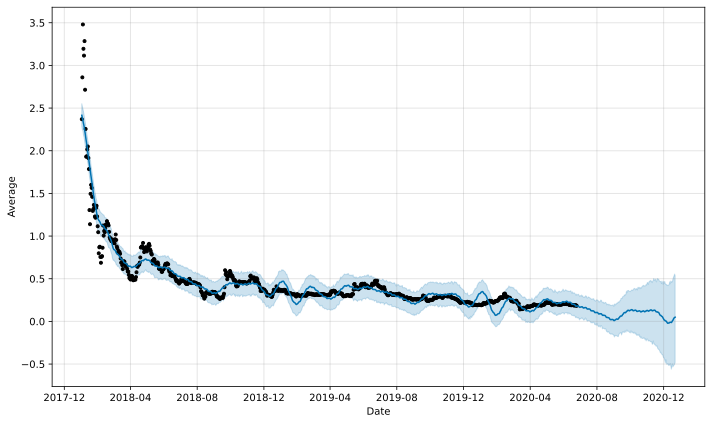

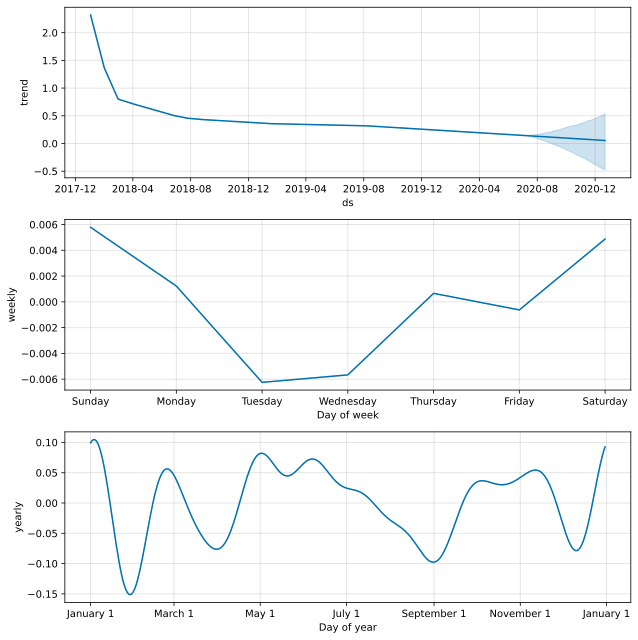

In [27]:
coin_prediction(data[data['date'] > '2018-01-01'], 180)

In [26]:
data

,open,high,low,close,volume,market_cap,date,average
0,0.184076,0.184982,0.180956,0.183570,1.055030e+09,8.124389e+09,2020-06-25,0.182969
1,0.188700,0.190857,0.183050,0.184272,1.138045e+09,8.155465e+09,2020-06-24,0.186953
2,0.189295,0.189973,0.187062,0.188680,1.093605e+09,8.350558e+09,2020-06-23,0.188518
3,0.185665,0.190080,0.185594,0.189272,1.209279e+09,8.376771e+09,2020-06-22,0.187837
4,0.188468,0.189103,0.185501,0.185610,8.936413e+08,8.214686e+09,2020-06-21,0.187302
...,...,...,...,...,...,...,...,...
2513,0.004397,0.004424,0.004175,0.004254,0.000000e+00,3.325863e+07,2013-08-08,0.004299
2514,0.004669,0.004682,0.004333,0.004417,0.000000e+00,3.453412e+07,2013-08-07,0.004508
2515,0.005637,0.005661,0.004629,0.004680,0.000000e+00,3.659101e+07,2013-08-06,0.005145
2516,0.005875,0.005980,0.005613,0.005613,0.000000e+00,4.387916e+07,2013-08-05,0.005796
